In [1]:
import pandas as pd
from dbfread import DBF
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## taxi+_zone_lookup

In [2]:

archivo_csv = 'C:\\Users\\Luis Fernando Martin\\OneDrive\\Escritorio\\Proyecto final henry\\Datasets\\taxi+_zone_lookup.csv'

# Lee el archivo CSV
df = pd.read_csv(archivo_csv)
df


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [3]:
# Función para verificar qué columnas contienen valores duplicados y contar la cantidad de duplicados
def columnas_con_duplicados(df):
    columnas_duplicadas = {}
    for col in df.columns:
        # Verificar si hay valores duplicados en la columna
        duplicados = df[col].duplicated(keep=False)  # `keep=False` marca todos los duplicados como True
        if duplicados.any():
            # Contar la cantidad de valores duplicados
            cantidad_duplicados = duplicados.sum()
            columnas_duplicadas[col] = cantidad_duplicados
    
    if columnas_duplicadas:
        print("Columnas con valores duplicados y sus cantidades:")
        for col, count in columnas_duplicadas.items():
            print(f"{col}: {count} duplicados")
    else:
        print("No hay columnas con valores duplicados.")

# Llamada a la función para ver las columnas con duplicados
columnas_con_duplicados(df)

Columnas con valores duplicados y sus cantidades:
Borough: 264 duplicados
Zone: 5 duplicados
service_zone: 264 duplicados


In [6]:
# Función para verificar qué columnas contienen valores NaN y cuántos hay en cada columna
def columnas_con_nan(df):
    nan_info = df.isna().sum()  # Cuenta los valores NaN por columna
    columnas_nan = nan_info[nan_info > 0]  # Filtra las columnas con más de 0 valores NaN
    
    if not columnas_nan.empty:
        print("Columnas con valores NaN y la cantidad de NaN en cada una:")
        print(columnas_nan)
    else:
        print("No hay columnas con valores NaN.")

# Llamada a la función para ver las columnas con NaN y sus cantidades
columnas_con_nan(df)


No hay columnas con valores NaN.


In [5]:
# Reemplaza los valores NaN en las columnas 'Zone' y 'service_zone' por "Sin Dato"
df[['Zone', 'service_zone']] = df[['Zone', 'service_zone']].fillna("Sin Dato")

# Muestra el DataFrame modificado
print(df)

     LocationID        Borough                     Zone service_zone
0             1            EWR           Newark Airport          EWR
1             2         Queens              Jamaica Bay    Boro Zone
2             3          Bronx  Allerton/Pelham Gardens    Boro Zone
3             4      Manhattan            Alphabet City  Yellow Zone
4             5  Staten Island            Arden Heights    Boro Zone
..          ...            ...                      ...          ...
260         261      Manhattan       World Trade Center  Yellow Zone
261         262      Manhattan           Yorkville East  Yellow Zone
262         263      Manhattan           Yorkville West  Yellow Zone
263         264        Unknown                       NV     Sin Dato
264         265        Unknown                 Sin Dato     Sin Dato

[265 rows x 4 columns]


C:\Users\Luis Fernando Martin\AppData\Local\Temp\ipykernel_4500\1824868757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Borough', data=df, palette='viridis')


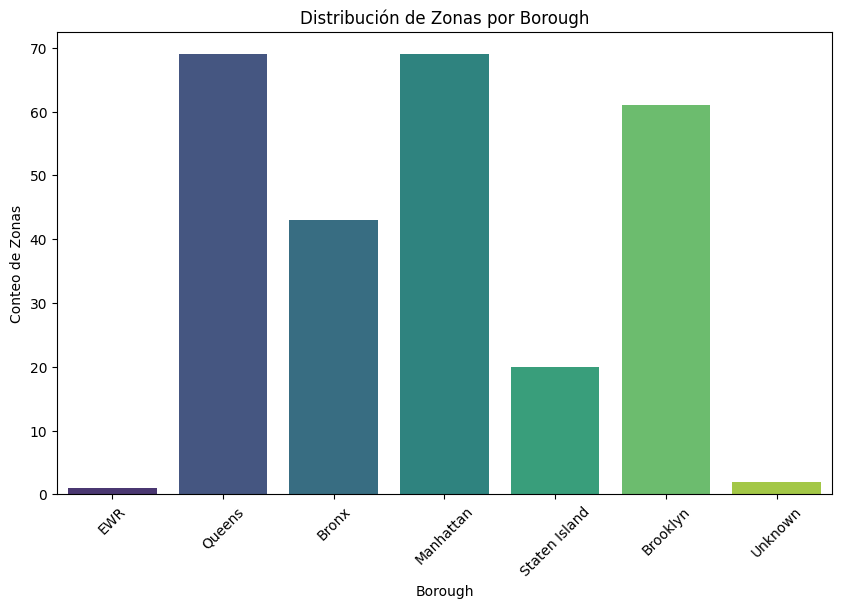

In [7]:
# 1. Distribución de las Zonas por Borough
plt.figure(figsize=(10, 6))
sns.countplot(x='Borough', data=df, palette='viridis')
plt.title('Distribución de Zonas por Borough')
plt.xlabel('Borough')
plt.ylabel('Conteo de Zonas')
plt.xticks(rotation=45)
plt.show()

##### Explicación: Este gráfico de barras nos muestra la cantidad de zonas en cada distrito (Borough)Es útil para identificar cuál es el distrito con más o menos zonas. En este gráfico de barras, visualizo la cantidad de zonas que pertenecen a cada borough. Puedo observar fácilmente cuál borough tiene más o menos zonas asignadas. Esto me ayuda a identificar la distribución de las zonas y a entender cómo se organizan espacialmente los diferentes boroughs. Es útil para detectar si algún borough tiene una concentración excesiva de zonas o si está subrepresentado en comparación con los demás.

C:\Users\Luis Fernando Martin\AppData\Local\Temp\ipykernel_4500\1931847417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='service_zone', data=df, palette='plasma')


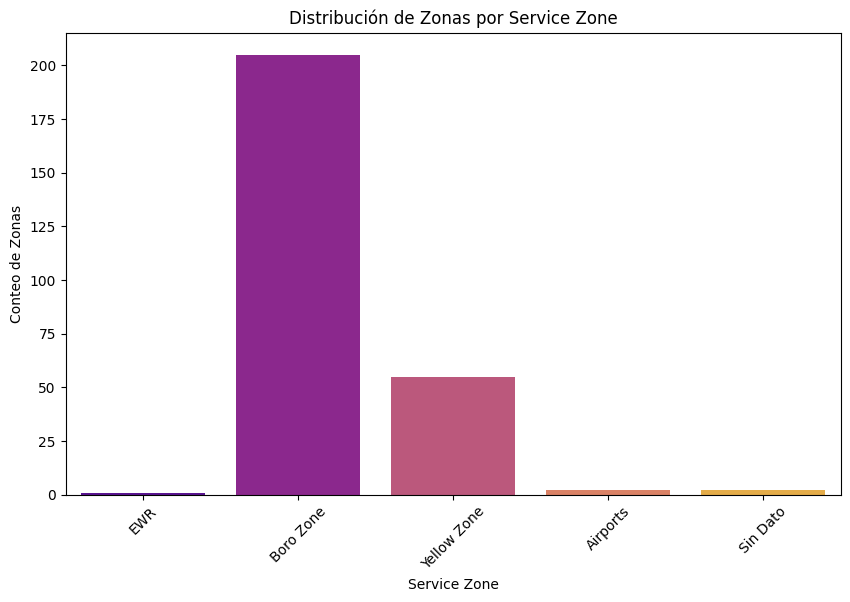

In [9]:
# 2. Distribución de Zonas por Service Zone
plt.figure(figsize=(10, 6))
sns.countplot(x='service_zone', data=df, palette='plasma')
plt.title('Distribución de Zonas por Service Zone')
plt.xlabel('Service Zone')
plt.ylabel('Conteo de Zonas')
plt.xticks(rotation=45)
plt.show()

##### Explicación: Aquí podemos ver cuántas zonas pertenecen a cada tipo de servicio. Nos ayuda a identificar cuál es el tipo de servicio predominante. Este gráfico muestra la cantidad de zonas en cada tipo de service zone (EWR, Boro Zone, Yellow Zone). Es evidente que algunas service zones tienen muchas más zonas que otras. Esto puede indicar una mayor actividad o importancia de ciertas áreas de servicio en comparación con otras, lo cual es crucial para la planificación de servicios y recursos.

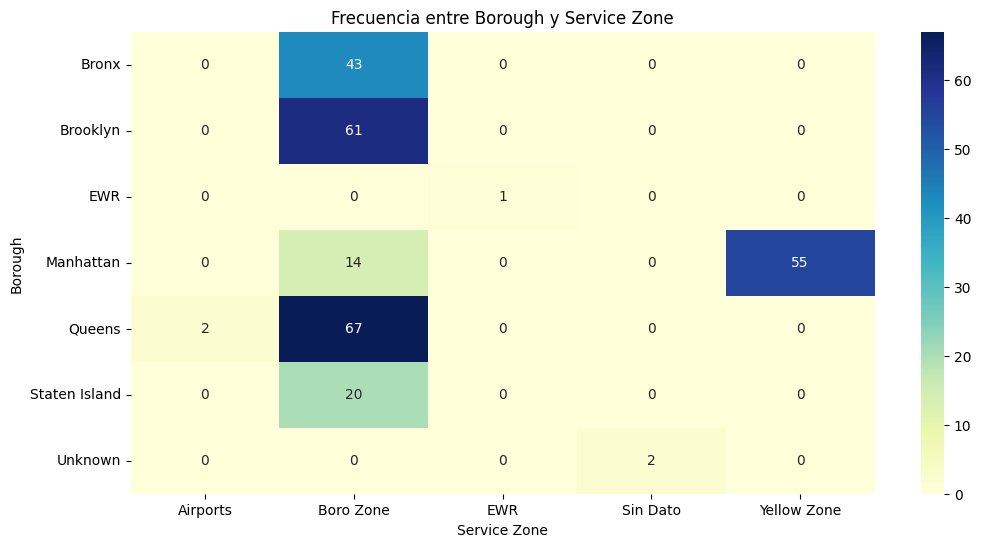

In [10]:
# 3 Mapa de Calor de Frecuencia entre Borough y Service Zone
plt.figure(figsize=(12, 6))
# Creo una tabla de frecuencia entre 'Borough' y 'service_zone'
heatmap_data = pd.crosstab(df['Borough'], df['service_zone'])
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Frecuencia entre Borough y Service Zone')
plt.xlabel('Service Zone')
plt.ylabel('Borough')
plt.show()

#### Explicación: Este mapa de calor muestra la frecuencia de cada combinación de Borough y Service Zone. Es útil para visualizar qué combinaciones son más frecuentes y ayuda a identificar patrones en los datos categóricos. El mapa de calor me muestra la frecuencia de combinaciones entre Borough y Service Zone. Las celdas más oscuras indican combinaciones más frecuentes, lo cual me ayuda a identificar patrones en la distribución de zonas. Este gráfico es fundamental para ver cómo las zonas de servicio se distribuyen entre los diferentes boroughs, detectando posibles áreas con una alta concentración o falta de cobertura.

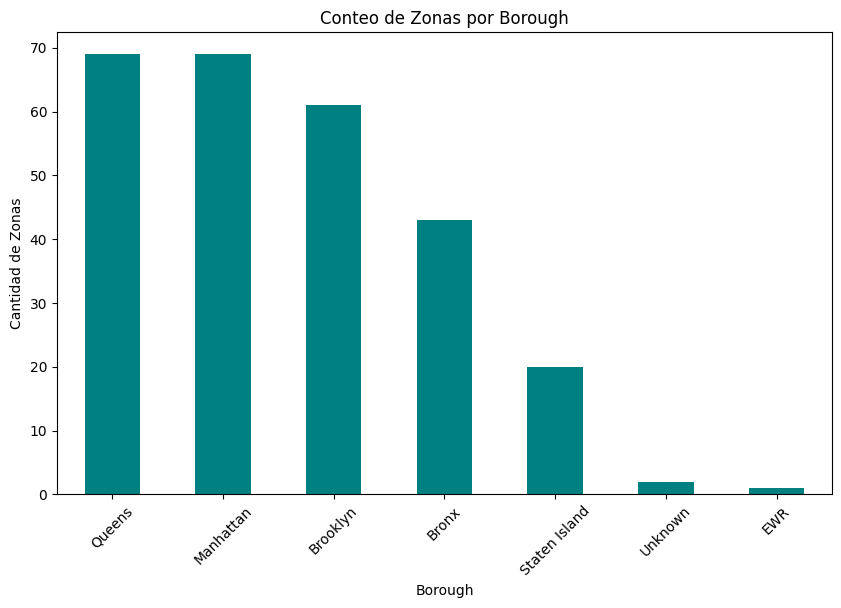

In [11]:
# 4. Conteo de Zonas por Borough
borough_count = df['Borough'].value_counts()
plt.figure(figsize=(10, 6))
borough_count.plot(kind='bar', color='teal')
plt.title('Conteo de Zonas por Borough')
plt.xlabel('Borough')
plt.ylabel('Cantidad de Zonas')
plt.xticks(rotation=45)
plt.show()

#### Explicación: Un gráfico simple que destaca qué distrito tiene más zonas. Esto es útil para tener un vistazo rápido de la distribución geográfica.  Este gráfico de barras presenta una manera sencilla de ver cuántas zonas tiene cada borough. La altura de cada barra indica la cantidad de zonas. Este gráfico es especialmente útil para comparar rápidamente los boroughs y ver cuál de ellos tiene más o menos zonas, facilitando la identificación de desbalances en la distribución.

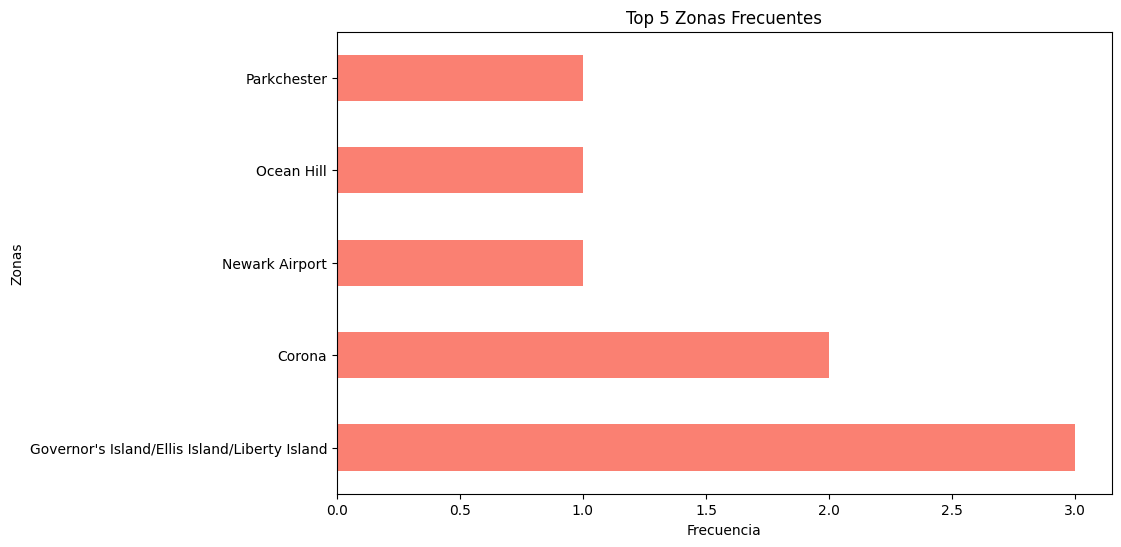

In [12]:
# 5. Frecuencia de las Zonas (Top 5)
top_zones = df['Zone'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
top_zones.plot(kind='barh', color='salmon')
plt.title('Top 5 Zonas Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Zonas')
plt.show()

### Explicación: Aquí mostramos las 5 zonas más frecuentes para entender qué zonas son las más representativas o utilizadas. Este gráfico de barras horizontales muestra las cinco zonas más frecuentes. Es ideal para destacar rápidamente cuáles son las zonas con mayor actividad o presencia en el dataset. Esto es útil para priorizar análisis y recursos en las áreas que tienen un mayor impacto en los datos.

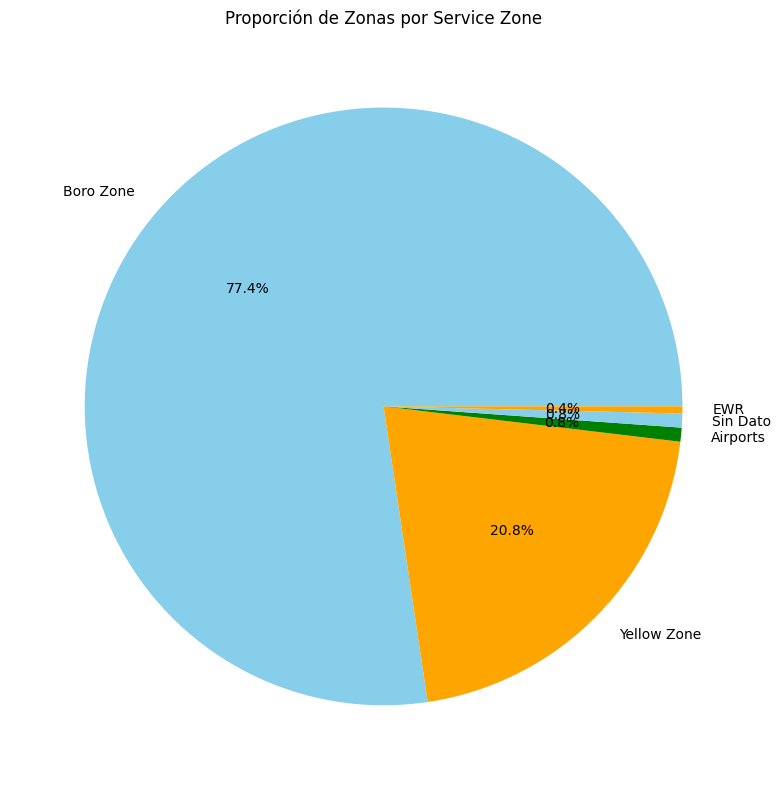

In [17]:
# 6. Gráfico Circular de Service Zone
plt.figure(figsize=(8, 8))
df['service_zone'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
plt.title('Proporción de Zonas por Service Zone')
plt.ylabel('')

# Añadimos algunos ajustes
plt.tight_layout()  # Espaciado entre porcentajes
plt.gca().set_aspect("equal")  # Aspecto circular
plt.xticks(fontsize=12)  # Tamaño de las etiquetas

plt.show()


##### Explicación: Un gráfico de pastel que muestra cómo se distribuyen los porcentajes de cada zona de servicio,  ideal para visualizar proporciones de manera clara. El gráfico circular o de pie me permite visualizar la proporción de cada tipo de Service Zone. Cada sección del círculo representa una service_zone y su tamaño refleja su contribución al total. Este gráfico es muy útil para ver rápidamente qué porcentaje del total ocupa cada zona de servicio, lo que facilita entender la estructura general del dataset.

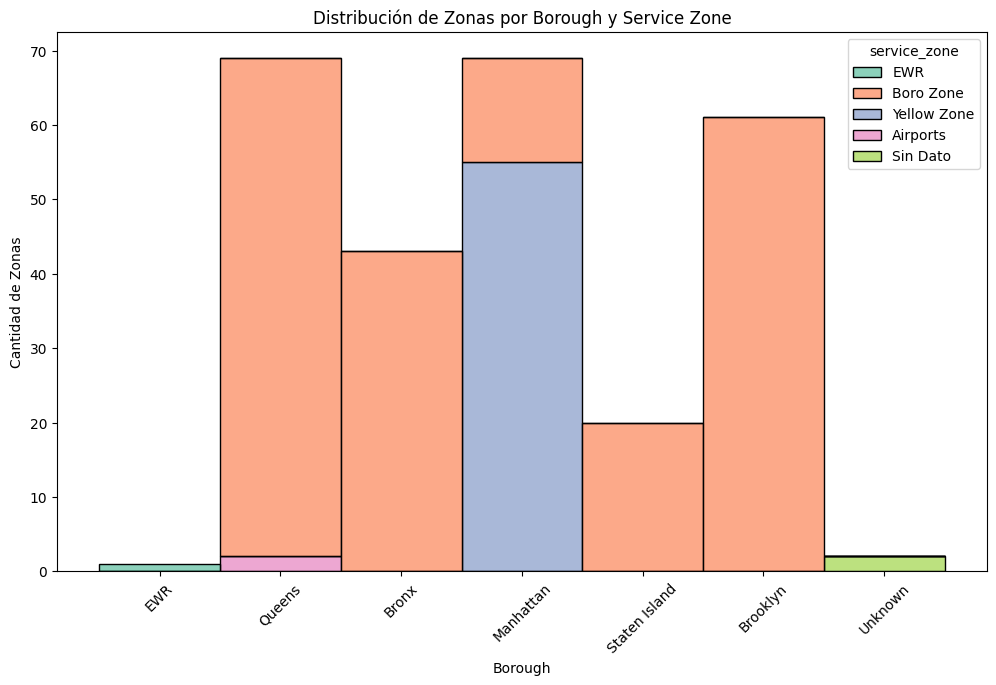

In [18]:
# 7. Distribución de Zonas por Borough usando Gráfico de Barras Apiladas
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Borough', hue='service_zone', multiple='stack', palette='Set2')
plt.title('Distribución de Zonas por Borough y Service Zone')
plt.xlabel('Borough')
plt.ylabel('Cantidad de Zonas')
plt.xticks(rotation=45)
plt.show()

##### Explicación: Este gráfico apilado nos muestra cómo se distribuyen las zonas de servicio dentro de cada distrito,permitiendo una comparación detallada entre distritos.  Este gráfico de barras apiladas muestra la distribución de service_zone dentro de cada Borough. Me ayuda a ver no solo cuántas zonas hay en cada borough, sino también cómo están divididas entre las diferentes zonas de servicio. Esto proporciona una comprensión más detallada de la estructura y combinación de zonas dentro de cada borough, lo cual es fundamental para analizar la cobertura y segmentación de las zonas de servicio.

## taxi_zones

In [20]:
archivo_dbf = r'C:\Users\Luis Fernando Martin\OneDrive\Escritorio\Proyecto final henry\Datasets\taxi_zones.dbf'

# Leer el archivo DBF y convertirlo en un DataFrame de pandas
tabla = DBF(archivo_dbf, load=True)
df1 = pd.DataFrame(iter(tabla))

df1

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx
259,260,0.133514,0.000422,Woodside,260,Queens
260,261,0.027120,0.000034,World Trade Center,261,Manhattan
261,262,0.049064,0.000122,Yorkville East,262,Manhattan


In [21]:
# Función para verificar qué columnas contienen valores duplicados y contar la cantidad de duplicados
def columnas_con_duplicados(df1):
    columnas_duplicadas = {}
    for col in df1.columns:
        # Verificar si hay valores duplicados en la columna
        duplicados = df1[col].duplicated(keep=False)  # `keep=False` marca todos los duplicados como True
        if duplicados.any():
            # Contar la cantidad de valores duplicados
            cantidad_duplicados = duplicados.sum()
            columnas_duplicadas[col] = cantidad_duplicados
    
    if columnas_duplicadas:
        print("Columnas con valores duplicados y sus cantidades:")
        for col, count in columnas_duplicadas.items():
            print(f"{col}: {count} duplicados")
    else:
        print("No hay columnas con valores duplicados.")

# Llamada a la función para ver las columnas con duplicados
columnas_con_duplicados(df1)

Columnas con valores duplicados y sus cantidades:
zone: 5 duplicados
LocationID: 5 duplicados
borough: 262 duplicados


In [22]:
# Función para verificar qué columnas contienen valores NaN y cuántos hay en cada columna
def columnas_con_nan(df1):
    nan_info = df1.isna().sum()  # Cuenta los valores NaN por columna
    columnas_nan = nan_info[nan_info > 0]  # Filtra las columnas con más de 0 valores NaN
    
    if not columnas_nan.empty:
        print("Columnas con valores NaN y la cantidad de NaN en cada una:")
        print(columnas_nan)
    else:
        print("No hay columnas con valores NaN.")

# Llamada a la función para ver las columnas con NaN y sus cantidades
columnas_con_nan(df1)

No hay columnas con valores NaN.


In [24]:
# Muestro las estadísticas descriptivas de las columnas numéricas
print(df1.describe())


         OBJECTID  Shape_Leng  Shape_Area  LocationID
count  263.000000  263.000000  263.000000  263.000000
mean   132.000000    0.094269    0.000402  131.984791
std     76.065761    0.054594    0.000482   76.073787
min      1.000000    0.014306    0.000006    1.000000
25%     66.500000    0.054722    0.000133   66.500000
50%    132.000000    0.084341    0.000268  132.000000
75%    197.500000    0.119488    0.000480  197.500000
max    263.000000    0.433470    0.004866  263.000000


### Gráfico 1: Distribución de las Áreas (Shape_Area)

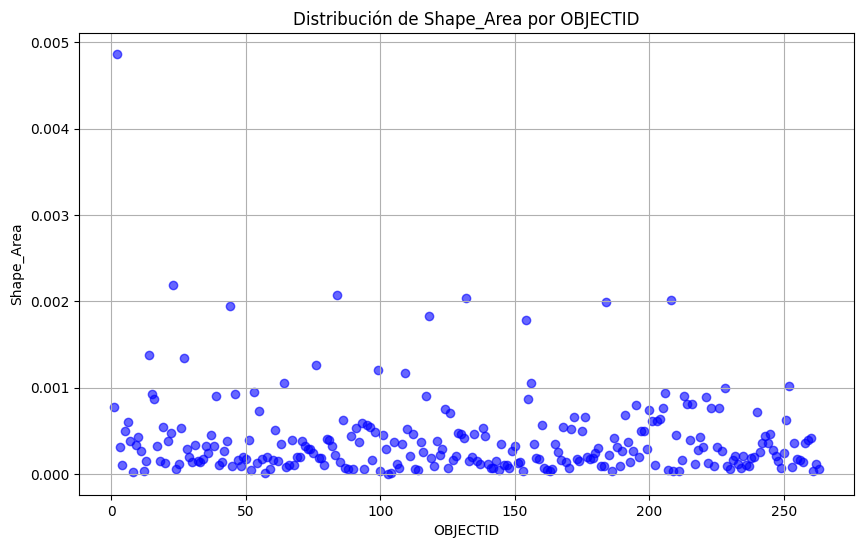

In [23]:
# Configuro el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión para mostrar la distribución de Shape_Area
plt.scatter(df1['OBJECTID'], df1['Shape_Area'], color='blue', alpha=0.6)

# Configuro las etiquetas y el título del gráfico
plt.title('Distribución de Shape_Area por OBJECTID')
plt.xlabel('OBJECTID')
plt.ylabel('Shape_Area')
plt.grid(True)

# Muestro el gráfico
plt.show()


#### En este gráfico de dispersión, estoy visualizando la distribución de la variable Shape_Area en función de OBJECTID. Cada punto representa una observación en mi dataset, mostrando cómo varía el área de las formas con respecto a su identificador único. La dispersión de los puntos ayuda a identificar posibles patrones o anomalías en la distribución del área.

### Gráfico 2: Comparación de Longitud y Área (Shape_LengcontraShape_Area)

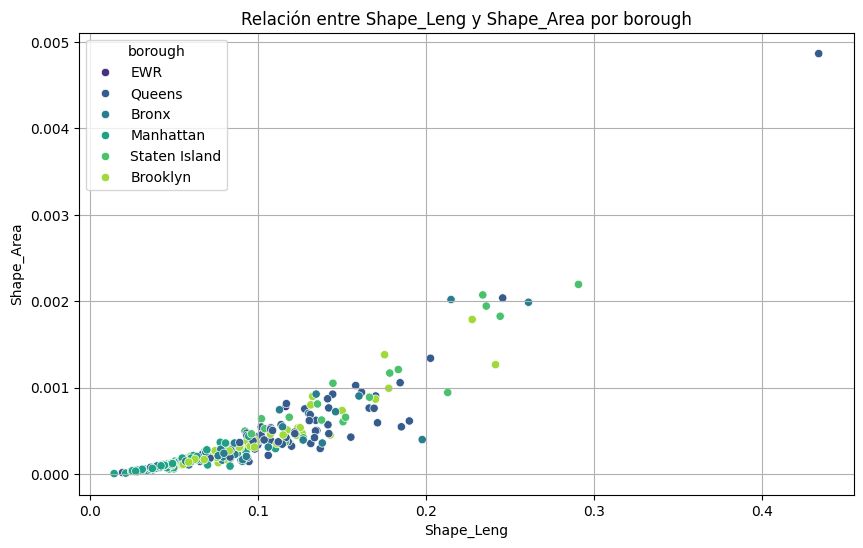

In [33]:
# Configuro el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Grafico un scatter plot para ver la relación entre Shape_Leng y Shape_Area
sns.scatterplot(x='Shape_Leng', y='Shape_Area', data=df1, hue='borough', palette='viridis')

# Configuro las etiquetas y el título del gráfico
plt.title('Relación entre Shape_Leng y Shape_Area por borough')
plt.xlabel('Shape_Leng')
plt.ylabel('Shape_Area')
plt.grid(True)

# Muestro el gráfico
plt.show()


#### Aquí, estoy comparando la longitud (Shape_Leng) con el área (Shape_Area). El gráfico de dispersión utiliza colores diferentes para representar los distintos valores de borough, lo que me permite ver cómo estas dos variables están relacionadas y cómo varían en diferentes barrios. Esto es útil para entender si existe alguna correlación o patrón entre la longitud y el área de las formas.

### Gráfico 3: Conteo de Zonas por borough

C:\Users\Luis Fernando Martin\AppData\Local\Temp\ipykernel_4500\3790027683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='borough', data=df1, palette='pastel')


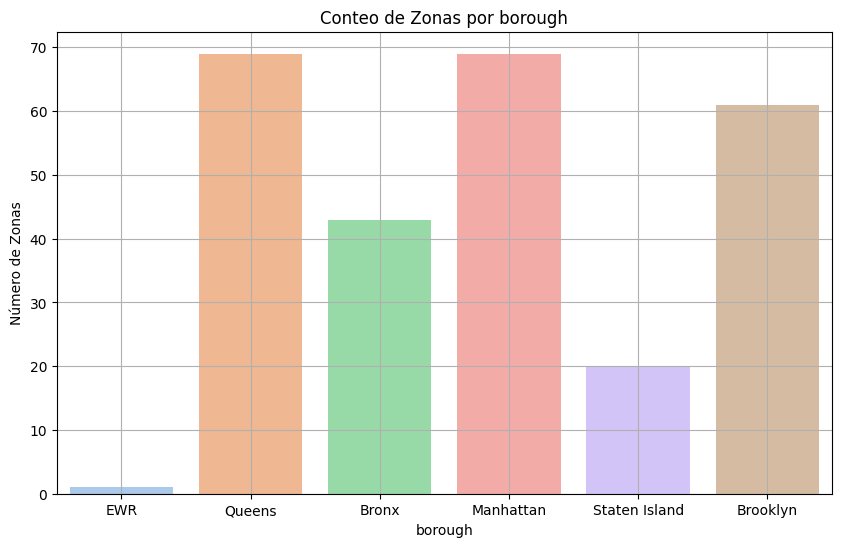

In [35]:
# Configuro el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras que cuenta las zonas por borough
sns.countplot(x='borough', data=df1, palette='pastel')

# Configuro las etiquetas y el título del gráfico
plt.title('Conteo de Zonas por borough')
plt.xlabel('borough')
plt.ylabel('Número de Zonas')
plt.grid(True)

# Muestro el gráfico
plt.show()


#### Este gráfico de barras muestra la cantidad de zonas en cada borough. Cada barra representa el número de zonas en un barrio específico, con colores pastel para una visualización más clara. Este gráfico es útil para ver qué barrios tienen más o menos zonas, proporcionando una visión general de la distribución geográfica de las zonas.



### Gráfico 4: Boxplot de Áreas por borough

C:\Users\Luis Fernando Martin\AppData\Local\Temp\ipykernel_4500\1195026020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='borough', y='Shape_Area', data=df1, palette='Set2')


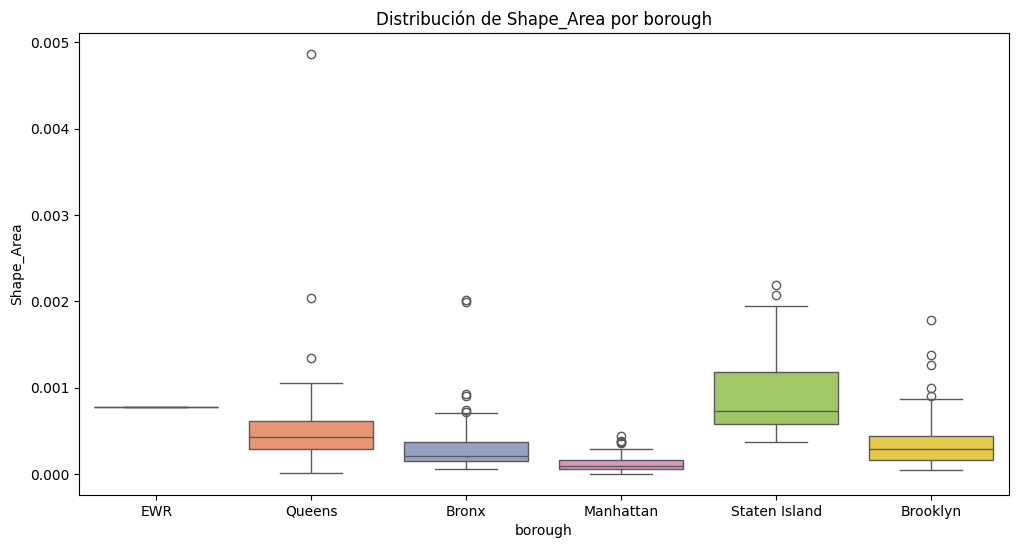

In [32]:
# Configuro el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Boxplot para comparar la distribución de Shape_Area por borough
sns.boxplot(x='borough', y='Shape_Area', data=df1, palette='Set2')

# Configuro las etiquetas y el título del gráfico
plt.title('Distribución de Shape_Area por borough')
plt.xlabel('borough')
plt.ylabel('Shape_Area')

# Muestro el gráfico
plt.show()


#### En este boxplot, comparo la distribución de Shape_Area en diferentes boroughs. Cada caja representa la variación del área en cada barrio, mostrando la mediana, los cuartiles y los posibles valores atípicos. Esto me ayuda a entender cómo varía el área de las formas en diferentes barrios y si hay algún barrio con áreas significativamente diferentes.

### Gráfico 5: Mapa de Calor (Heatmap) de Correl

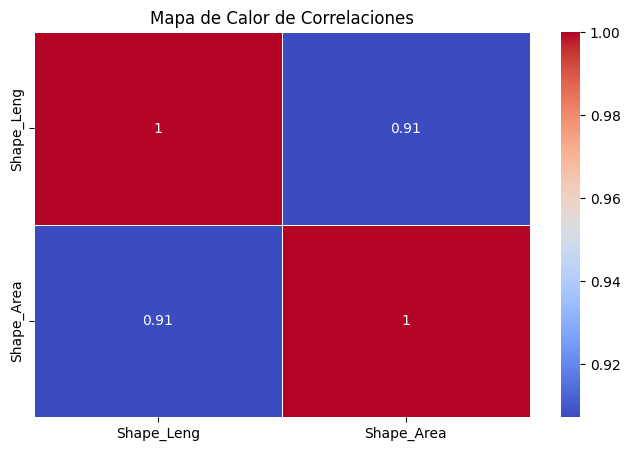

In [36]:
# Configuro el tamaño del gráfico
plt.figure(figsize=(8, 5))

# Calculo la matriz de correlación
correlation_matrix = df1[['Shape_Leng', 'Shape_Area']].corr()

# Grafico un mapa de calor para visualizar las correlaciones
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Configuro el título del gráfico
plt.title('Mapa de Calor de Correlaciones')

# Muestro el gráfico
plt.show()


####  Este mapa de calor muestra la correlación entre Shape_Leng y Shape_Area. Los valores en el mapa indican cómo estas dos variables están relacionadas entre sí. Un valor cercano a 1 o -1 indica una alta correlación positiva o negativa, respectivamente, mientras que valores cercanos a 0 indican poca o ninguna correlación. Este gráfico es útil para identificar si existe una relación lineal entre las dos variables.

### Grafico 6:Histograma deHistograma deShape_Leng

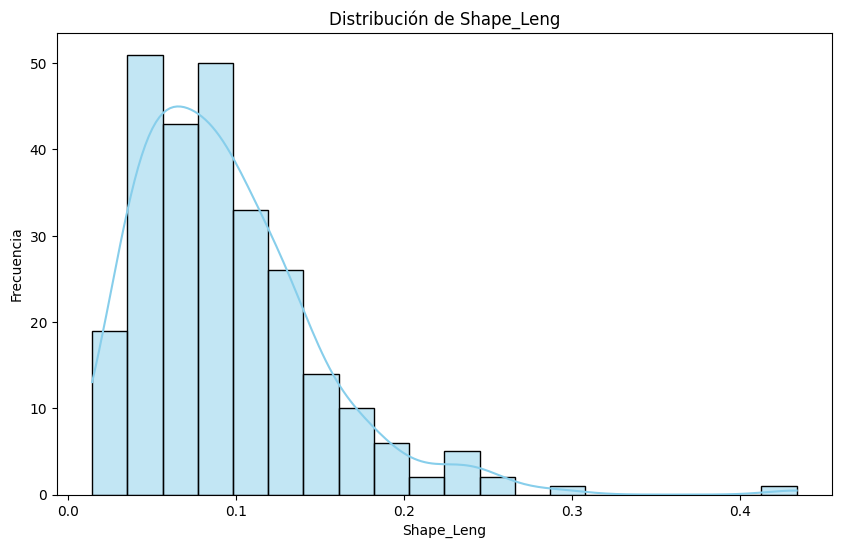

In [37]:
# Configuro el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Grafico un histograma para visualizar la distribución de Shape_Leng
sns.histplot(df1['Shape_Leng'], bins=20, color='skyblue', kde=True)

# Configuro las etiquetas y el título del gráfico
plt.title('Distribución de Shape_Leng')
plt.xlabel('Shape_Leng')
plt.ylabel('Frecuencia')

# Muestro el gráfico
plt.show()


#### Aquí estoy visualizando la distribución de Shape_Leng mediante un histograma. Las barras representan la frecuencia de diferentes rangos de longitud, mientras que la curva KDE proporciona una estimación de la densidad de la longitud. Este gráfico ayuda a entender cómo se distribuyen las longitudes en mi dataset y si hay valores más comunes o raros.